In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.graphics.gofplots as smg

In [111]:
df = pd.read_csv("housing.csv", header = 0)

In [112]:
df.head()

,P,S,A,Ut,Pol,Fp
0,205.452,23.46,6,0,0,1
1,185.328,20.03,5,0,0,1
2,248.422,27.77,6,0,0,0
3,154.690,20.17,1,0,0,0
4,221.801,26.45,0,0,0,1


In [113]:
df.describe()

,P,S,A,Ut,Pol,Fp
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,247.655721,25.20965,9.392000,0.519000,0.204000,0.518000
std,42.192729,2.91848,9.426728,0.499889,0.403171,0.499926
min,134.316000,20.03000,0.000000,0.000000,0.000000,0.000000
25%,215.646750,22.82750,3.000000,0.000000,0.000000,0.000000
50%,245.832500,25.36000,6.000000,1.000000,0.000000,1.000000
75%,278.264500,27.75000,13.000000,1.000000,0.000000,1.000000
max,345.197000,30.00000,60.000000,1.000000,1.000000,1.000000


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P       1000 non-null   float64
 1   S       1000 non-null   float64
 2   A       1000 non-null   int64  
 3   Ut      1000 non-null   int64  
 4   Pol     1000 non-null   int64  
 5   Fp      1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


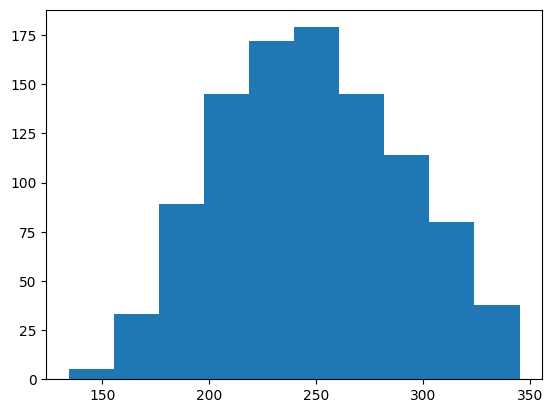

In [115]:
# Sales price variable normality test
plt.hist(df['P'])
plt.show()

*Histogram is bell-shaped indicating Housing price variable is assumed approximately normalilty distributed. Hence, Normality assumption is verified.*

<Figure size 500x300 with 0 Axes>

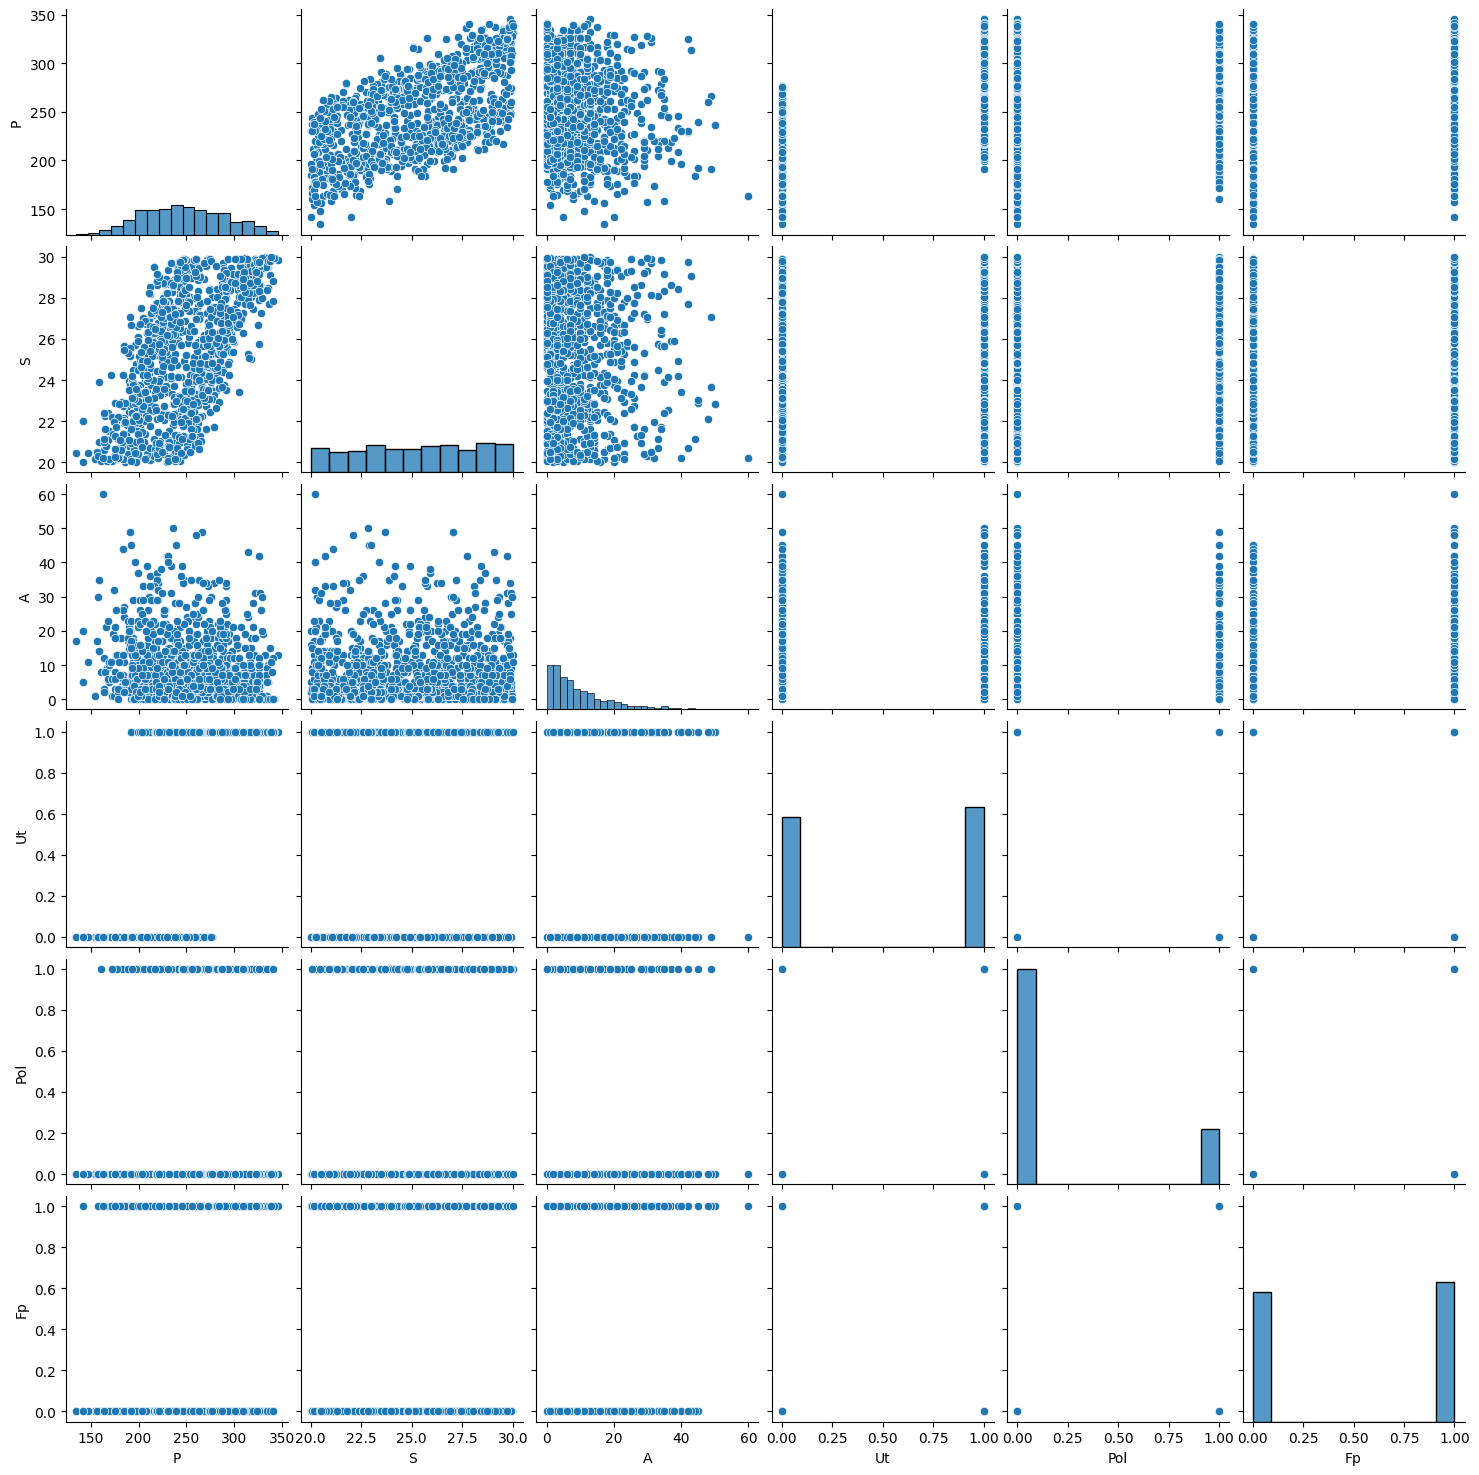

In [116]:
# Linear relationship test
plt.figure(figsize=(5, 3))
sns.pairplot(df)
plt.show()

In [117]:
correlation_matrix = df.corr()
print(correlation_matrix)

            P         S         A        Ut       Pol        Fp
P    1.000000  0.594678 -0.079852  0.728744  0.051890  0.064752
S    0.594678  1.000000 -0.027183  0.023371 -0.004176  0.098473
A   -0.079852 -0.027183  1.000000 -0.031959  0.027663  0.033124
Ut   0.728744  0.023371 -0.031959  1.000000  0.020483 -0.007378
Pol  0.051890 -0.004176  0.027663  0.020483  1.000000 -0.043068
Fp   0.064752  0.098473  0.033124 -0.007378 -0.043068  1.000000


From the scattered diagram we observed that the independent variables (Area and Age) have linear relationship with the sales price variable.
Linearity assumption verified.
Also there are correlations among all the expenditure variables, means there is multicollienearity.

In [124]:
# Perform regression analysis
formula_1 = "P ~ S + Ut + I(S*Ut) + A + Pol + Fp + I(Pol*Fp)"
model_1 = sm.formula.ols(formula_1, data=df).fit()
# Print regression summary
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     953.6
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:03:37   Log-Likelihood:                -4138.2
No. Observations:                1000   AIC:                             8292.
Df Residuals:                     992   BIC:                             8332.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      24.2414      6.209      3.904      

In [119]:
# Calculate VIF for each variable
vif_values = pd.DataFrame()
vif_values["Variable"] = model_1.model.exog_names[1:]  # Excluding the intercept
vif_values["VIF"] = [variance_inflation_factor(model_1.model.exog, i) for i in range(1, model_1.model.exog.shape[1])]

# Print VIF values
print(vif_values)

      Variable        VIF
0            S   2.208352
1           Ut  76.397898
2    I(S * Ut)  78.041544
3            A   1.004610
4          Pol   1.952888
5           Fp   1.270127
6  I(Pol * Fp)   2.167511


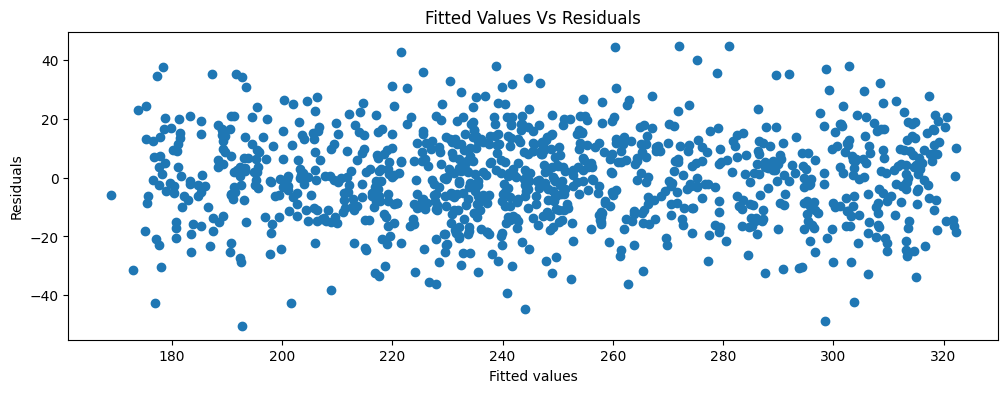

In [125]:
#Plot Fitted Values Vs Residuals
plt.figure(figsize=(12, 4))
plt.scatter(model_1.fittedvalues, model_1.resid)
plt.title("Fitted Values Vs Residuals")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

230104.16460792487


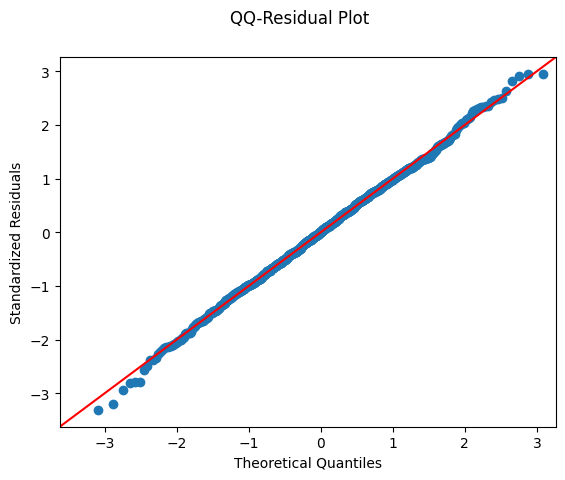

In [121]:
# Calculate SSR
ssrf_1 = sum(model_1.resid**2)
print(ssrf_1)
# Generate QQ-Residual plot
qqplot = smg.qqplot(model_1.resid_pearson, line='45')
qqplot.suptitle("QQ-Residual Plot")
qqplot.axes[0].set_xlabel("Theoretical Quantiles")
qqplot.axes[0].set_ylabel("Standardized Residuals")
plt.show()

In [122]:
# Reduced model
model_2 = sm.formula.ols("P ~ S + A", data=df).fit()
# Print regression summary
print(model_2.summary())

# Calculate SSR
ssrf_2 = sum(model_2.resid**2)
print(ssrf_2)

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     277.6
Date:                Sat, 08 Jul 2023   Prob (F-statistic):           1.44e-96
Time:                        16:26:39   Log-Likelihood:                -4939.3
No. Observations:                1000   AIC:                             9885.
Df Residuals:                     997   BIC:                             9899.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.2309      9.405      3.640      0.0

In [123]:
##Full model
model_3 = sm.formula.ols("P ~ S + Ut + I(S*Ut) + A + Pol + Fp", data=df).fit()
# Print regression summary
print(model_3.summary())

# Calculate SSR
ssrf_3 = sum(model_3.resid**2)
print(ssrf_3)

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1113.
Date:                Sat, 08 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:26:39   Log-Likelihood:                -4138.4
No. Observations:                1000   AIC:                             8291.
Df Residuals:                     993   BIC:                             8325.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.5000      6.192      3.957      0.0